In [4]:
import numpy as np
from src.Enums import Enums
from src.lib.Solver import Solver

In [5]:
from src.AlgorithmFactory import AlgorithmFactory

ga = AlgorithmFactory.get(Enums.algo.ga)

ga.set_hyper_parameter(Enums.hyperParam.numberOfIteration, 100) \
    .set_hyper_parameter(Enums.hyperParam.numberOfPopulation, 100) \
    .set_hyper_parameter(Enums.hyperParam.geneticCrossoverPercentage, 0.4) \
    .set_hyper_parameter(Enums.hyperParam.geneticMutationPercentage, 0.1) \
    .set_stop_criteria(Enums.algoSetting.stopCriteriaNumberOfGeneration, 100)

In [6]:
from src.problems.QAP import QAPProblem

problem = QAPProblem()
problem.set_parameters(url='https://www.opt.math.tugraz.at/qaplib/data.d/chr12a.dat')

objective function: 12174.0
is feasible: YES

decision variables: [array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])]



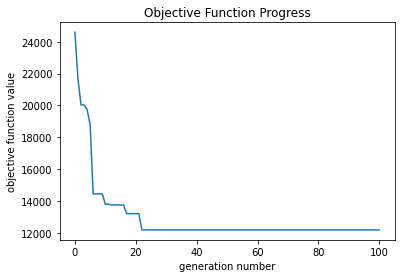

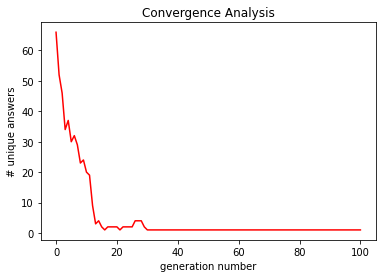

In [7]:
solver = Solver(ga, problem)
solver.with_objective_function_progress() \
    .with_convergence_report()

solver.solve()

print(solver.get_best_found_answer())
solver.show_plots()

In [8]:
# https://www.sfu.ca/~ssurjano/crossit.html
def cross_in_tray_function(x: list):
    x1 = x[0]
    x2 = x[1]

    fact1 = np.sin(x1) * np.sin(x2)
    fact2 = np.exp(abs(100 - np.sqrt(x1 ** 2 + x2 ** 2) / np.pi))

    return -0.0001 * (np.abs(fact1 * fact2) + 1) ** 0.1

In [9]:
# https://www.sfu.ca/~ssurjano/ackley.html
def ackley_function(x: list):  # todo fix it for numpy
    a = 20
    b = 0.2
    c = 2 * np.pi

    d = len(x)

    x = np.array(x)
    sum1 = np.dot(x, x)
    sum2 = sum(np.cos(c * x))

    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)

    return term1 + term2 + a + np.e

In [10]:
def custom_function(variables: list):
    x = variables[0]
    y = variables[1]

    return (x - 3.14) ** 2 + (y - 2.72) ** 2 + np.sin(3 * x + 1.41) + np.sin(4 * y - 1.73)

In [11]:
from src.problems.MathematicalOptimizationProblem import MathematicalOptimizationProblem

problem = MathematicalOptimizationProblem()
# problem.set_parameters(2, (-10, 10), cross_in_tray_function)
# problem.set_parameters(2, (-32.768, 32.768), ackley_function)
problem.set_parameters(2, (0, 5), custom_function)

objective function: 14.77820022642518
is feasible: YES

decision variables: [0.08599991444643407, 0.85857509544909]



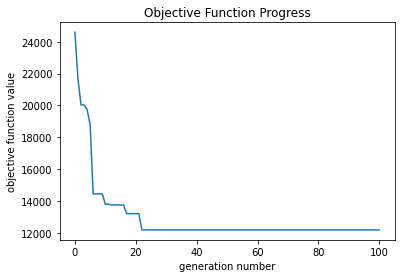

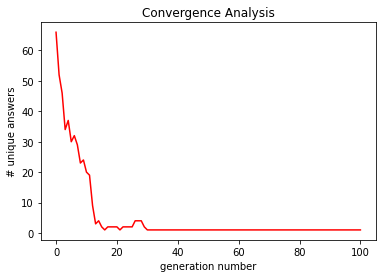

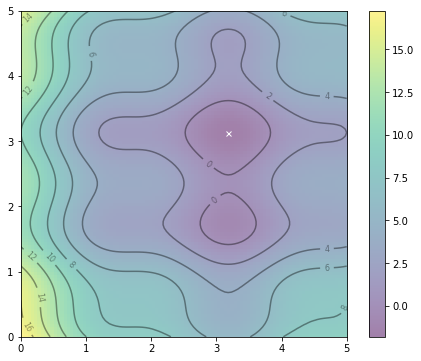

In [12]:
solver = Solver(ga, problem)
solver.with_objective_function_progress() \
    .with_convergence_report()

solver.solve()

print(solver.get_best_found_answer())
solver.show_plots()